In [9]:
import pulp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
RANDOM_STATE = 7

In [10]:
train = pd.DataFrame.from_csv('marketing_dataset/train.csv')
train

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no
5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes
6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no
7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no
8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes
9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no


In [11]:
wszystkie=np.array(train)
X=wszystkie[:,:-1]
y=wszystkie[:,-1]

In [12]:
X

array([[60, 'services', 'married', ..., 761, 1, 'other'],
       [25, 'student', 'single', ..., 180, 2, 'failure'],
       [38, 'services', 'married', ..., 344, 1, 'failure'],
       ..., 
       [32, 'blue-collar', 'married', ..., -1, 0, 'unknown'],
       [50, 'management', 'married', ..., 98, 2, 'other'],
       [33, 'management', 'single', ..., -1, 0, 'unknown']], dtype=object)

In [13]:
y

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

In [14]:
#podział zbioru testowego

X2, X_test, y2, y_test = train_test_split(X, y,
                                        test_size=0.10,
                                        random_state=RANDOM_STATE)

X_train, X_valid, y_train, y_valid = train_test_split(X2, y2,
                                        test_size=0.80,
                                        random_state=RANDOM_STATE)

In [15]:
#próba wizualizacji
df = pd.read_csv('marketing_dataset/train.csv')



In [16]:
df.tail

<bound method NDFrame.tail of       Unnamed: 0  age            job   marital  education default  balance  \
0              0   60       services   married   tertiary      no     4256   
1              1   25        student    single  secondary      no      154   
2              2   38       services   married  secondary      no      507   
3              3   40     management    single   tertiary      no     1361   
4              4   39     technician   married  secondary      no      834   
5              5   36     management   married   tertiary      no     2987   
6              6   40   entrepreneur   married   tertiary      no     1953   
7              7   51       services    single  secondary      no      513   
8              8   51        retired   married    primary      no     1495   
9              9   38     management    single   tertiary      no     6836   
10            10   45     management   married  secondary      no     5888   
11            11   55     technici

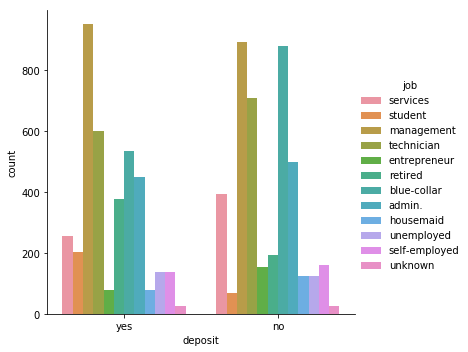

In [17]:
sns.catplot('deposit',data=train, hue='job', kind='count')

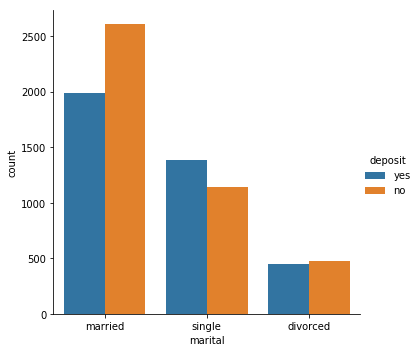

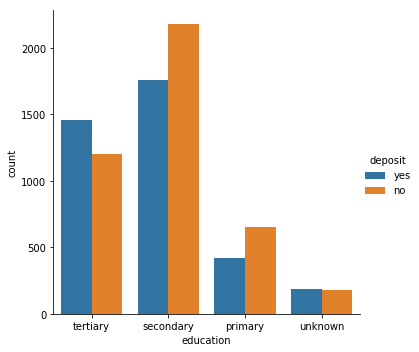

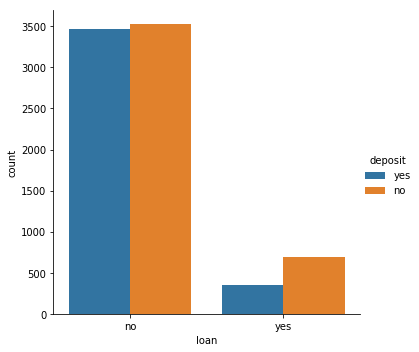

In [24]:
sns.catplot('marital',data=train, hue='deposit', kind='count')
sns.catplot('education',data=train, hue='deposit', kind='count')
sns.catplot('loan',data=train, hue='deposit', kind='count')

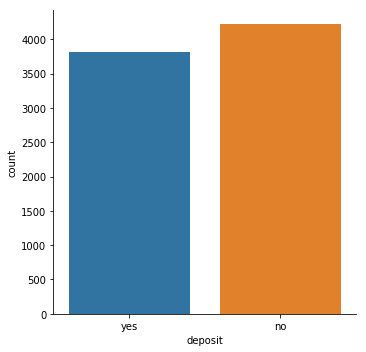

In [25]:
## Ile ludzi wzięło depozyt
sns.catplot('deposit',data=train, kind='count')

In [44]:
##train["deposit2"]=train["deposit"]=="yes"

In [46]:
train["deposit2"]=np.ones((len(train["deposit"]),1))

In [53]:
train["deposit2"][train["deposit"]=="no"]=0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
train["deposit2"]

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
5       1.0
6       0.0
7       0.0
8       1.0
9       0.0
10      0.0
11      1.0
12      0.0
13      1.0
14      1.0
15      0.0
16      0.0
17      1.0
18      0.0
19      1.0
20      0.0
21      0.0
22      0.0
23      0.0
24      1.0
25      1.0
26      0.0
27      1.0
28      1.0
29      0.0
       ... 
8006    1.0
8007    0.0
8008    0.0
8009    1.0
8010    1.0
8011    0.0
8012    1.0
8013    0.0
8014    0.0
8015    1.0
8016    1.0
8017    1.0
8018    0.0
8019    0.0
8020    0.0
8021    1.0
8022    1.0
8023    0.0
8024    0.0
8025    0.0
8026    0.0
8027    0.0
8028    0.0
8029    1.0
8030    1.0
8031    1.0
8032    1.0
8033    1.0
8034    1.0
8035    0.0
Name: deposit2, Length: 8036, dtype: float64

In [60]:
np.sum(train["deposit"]=="no")

4217

In [61]:
np.sum(train["deposit"]=="yes")

3819

In [54]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit2
0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes,1.0
1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes,1.0
2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no,0.0
3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes,1.0
4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no,0.0
5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes,1.0
6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no,0.0
7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no,0.0
8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes,1.0
9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no,0.0


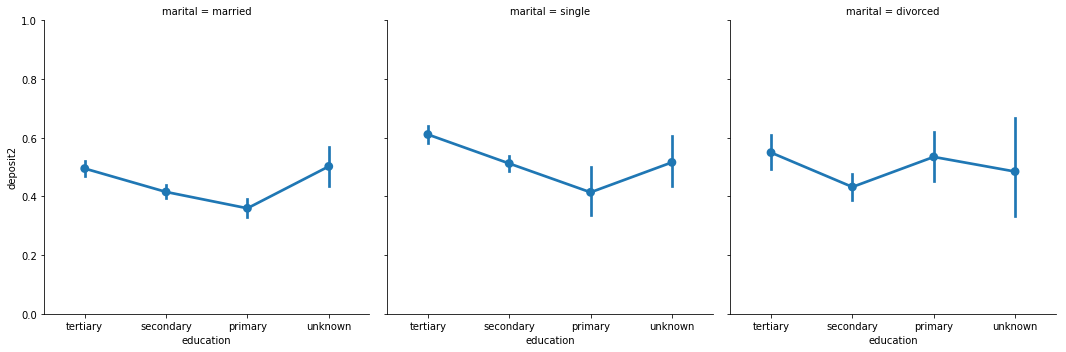

In [66]:
sns.factorplot("education", "deposit2", col ='marital', data=train).set(ylim=(0, 1))

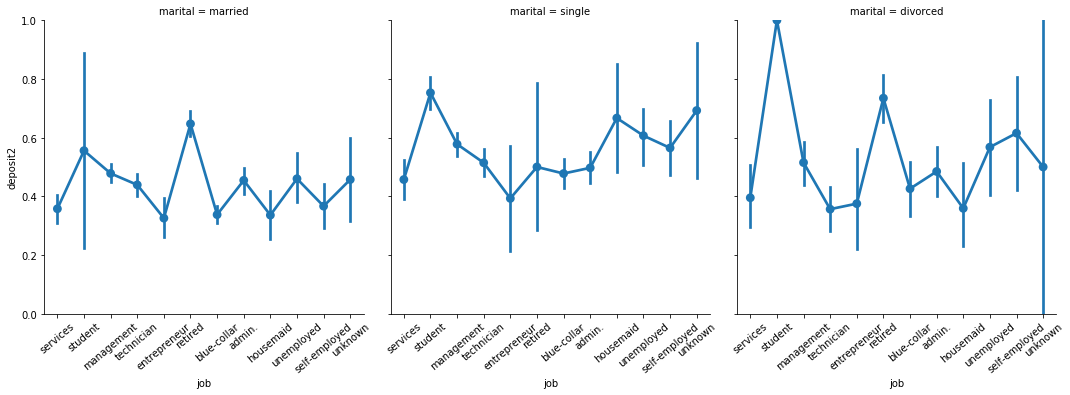

In [75]:
g = sns.factorplot("job", "deposit2", col ='marital', data=train).set(ylim=(0, 1))
g.set_xticklabels(rotation=40)

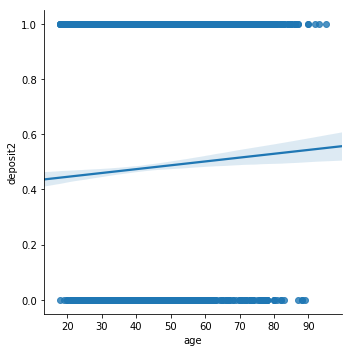

In [77]:
sns.lmplot("age", "deposit2", data = train);